In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("Apply_Job.csv")
data.head(10)

,Exp in Years,Salary in Lakh,Got Job
0,1,2,1
1,2,4,1
2,5,9,1
3,7,12,1
4,12,18,1
5,15,19,1
6,19,15,1
7,11,10,1
8,10,4,1
9,20,25,0


In [3]:
real_x  = data.iloc[: , 0:2].values
real_y = data.iloc[: , 2].values

In [4]:
from sklearn.model_selection import train_test_split
training_x ,test_x , training_y , test_y = train_test_split(real_x ,real_y , test_size = 0.33, random_state = 0)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dt_c = DecisionTreeClassifier()
dt_c.fit(training_x , training_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
dt_c.score(training_x,training_y)

1.0

In [8]:
pred_train = dt_c.predict(training_x)
pred_test = dt_c.predict(test_x)

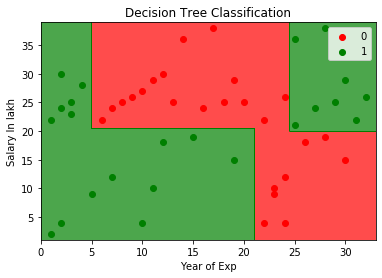

In [17]:
#graph
from matplotlib.colors import ListedColormap
clt = dt_c 
h  = 0.01
x_plot ,z_plot = real_x ,real_y

x_min , x_max = x_plot[: , 0].min() -1 , x_plot[: , 0].max()+1
y_min , y_max = x_plot[: , 1].min() -1 , x_plot[: , 1].max()+1
xx ,yy = np.meshgrid(np.arange(x_min , x_max , h),np.arange(y_min , y_max , h))

z = clt.predict(np.array([xx.ravel(),yy.ravel()]).T)
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha = 0.7, cmap = ListedColormap(("red", "green")))

                 
for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(x_plot[z_plot ==j, 0],x_plot[z_plot ==j, 1], c = ['red', 'green'][i],cmap = ListedColormap(('red','green')) ,label=j)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min() , yy.max())
plt.title("Decision Tree Classification")
plt.legend()
plt.ylabel("Salary In lakh")
plt.xlabel("Year of Exp")
plt.show()